In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import silhouette_score

## Importing First Dataset

In [2]:
# using dataset from https://www.kaggle.com/devvret/brazil-real-estate-listings

data = pd.read_csv('./properati_br_2016_11_01_properties_rent.csv')

In [3]:
data.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN,NaN
1,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,NaN,3.0,NaN,http://alphaville-barueri.properati.com.br/q8z...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/Wjq7toq-DpwK...,NaN
2,2013-04-25,rent,house,Centro,|Brasil|São Paulo|Jundiaí|Centro|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,2.0,NaN,http://centro-jundiai.properati.com.br/qe2_alu...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN,NaN
3,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://alphaville-barueri.properati.com.br/s9p...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/X7PtsZjj8Vqz...,NaN
4,2013-04-25,rent,apartment,Barueri,|Brasil|São Paulo|Barueri|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,NaN,http://barueri.properati.com.br/s9u_aluga-se_a...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/9/URn3U3gg-F6C...,NaN


In [4]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,3.0,46030.000000,46030.000000,92334.000000,92334.000000,92334.000000,15848.000000,75584.000000,70415.000000,70415.000000,5285.000000,58763.000000,3.177300e+04
mean,4164138.0,-22.861939,-46.707036,3935.703554,3928.693581,1228.255667,234.658695,152.538500,16.288983,52.128047,49.528855,2.158161,9.759202e+02
std,0.0,3.585125,2.672557,9325.828330,9197.214373,2875.387441,2444.656264,645.357711,212.996846,681.577383,3043.289924,2.192546,9.845683e+03
min,4164138.0,-33.692432,-97.497955,0.000000,0.000000,0.000000,0.000000,0.000000,0.028084,0.090000,1.000000,1.000000,1.000000e+00
25%,4164138.0,-23.619106,-47.024731,1140.000000,1127.850000,352.610000,0.000000,52.000000,5.200800,16.666667,3.000000,1.000000,3.500000e+02
50%,4164138.0,-23.562963,-46.671908,1900.000000,1918.200000,599.700000,79.000000,80.000000,7.801250,25.000000,6.000000,1.000000,5.560000e+02
75%,4164138.0,-23.030475,-46.567808,3600.000000,3593.240000,1123.380000,180.000000,150.000000,12.482000,40.000000,10.000000,2.000000,9.530000e+02
max,4164138.0,25.860630,-34.813914,470000.000000,353358.360000,110472.820000,200000.000000,75000.000000,28708.730000,92000.000000,221240.000000,40.000000,1.490000e+06


In [5]:
data.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
geonames_id                   97350
lat_lon                       51323
lat                           51323
lon                           51323
price                          5019
currency                       5020
price_aprox_local_currency     5019
price_aprox_usd                5019
surface_total_in_m2           81505
surface_covered_in_m2         21769
price_usd_per_m2              26938
price_per_m2                  26938
floor                         92068
rooms                         38590
expenses                      65580
properati_url                     0
description                       0
title                             0
image_thumbnail                5134
location                      51323
dtype: int64

Looks like the latitude and longitude are mostly empty. We might have to not use that data and focus on neighborhoods if we use this dataset.

## São Paulo

In [6]:
data['place_with_parent_names'].value_counts()

|Brasil|São Paulo|Santo André|                                2322
|Brasil|São Paulo|São Paulo|Moema|                            2214
|Brasil|São Paulo|Praia Grande|                               1784
|Brasil|São Paulo|São Paulo|                                  1763
|Brasil|São Paulo|São Paulo|Jardim Paulista|                  1628
                                                              ... 
|Brasil|São Paulo|Caçapava|Vila Resende|                         1
|Brasil|Rio de Janeiro|Arraial do Cabo|                          1
|Brasil|São Paulo|Atibaia|Jardim das Cerejeiras|                 1
|Brasil|São Paulo|São Roque|Patrimônio do Carmo|                 1
|Brasil|São Paulo|São José do Rio Preto|Parque das Amoras|       1
Name: place_with_parent_names, Length: 3728, dtype: int64

In [7]:
# code found at 
# https://stackoverflow.com/questions/44237170/how-to-search-a-partial-string-in-the-whole-dataframe-using-pandas

mask = data.applymap(lambda x: 'São Paulo|São Paulo|' in str(x))

In [8]:
data1 = data[mask.any(axis=1)]
data1.shape

(39191, 25)

Of the 97,353 listings in the dataset, 39,191 come from São Paulo, the city (it's also the name of a state, so it's important to specify).

In [9]:
data1['place_name'].value_counts()

Moema                   2214
São Paulo               1763
Jardim Paulista         1628
Vila Nova Conceição     1289
Itaim Bibi              1248
                        ... 
Vila Santa Teresinha       1
Jardim Ponte Rasa          1
Jardim Redil               1
Vila Dalva                 1
Vila Santa Lúcia           1
Name: place_name, Length: 538, dtype: int64

Looks like we have 538 different places in São Paulo.

According to [Wikipedia](#https://en.wikipedia.org/wiki/Subdivisions_of_S%C3%A3o_Paulo), there are 32 boroughs in the city, and a total of 96 districts between them. There may be a number of neighborhoods within each district. This may make mapping difficult.

In [10]:
data1['property_type'].value_counts()

apartment    26303
store         6649
house         6077
PH             162
Name: property_type, dtype: int64

Most of the listings in Sao Paulo are apartments, with 26,303 listings. There's an almost equal number of stores and houses, with 6649 stores and 6077 houses.

In [11]:
data1.isnull().sum()

created_on                        0
operation                         0
property_type                     0
place_name                        0
place_with_parent_names           0
geonames_id                   39191
lat_lon                       17468
lat                           17468
lon                           17468
price                          2878
currency                       2879
price_aprox_local_currency     2878
price_aprox_usd                2878
surface_total_in_m2           31658
surface_covered_in_m2          5534
price_usd_per_m2               8804
price_per_m2                   8804
floor                         36944
rooms                         14108
expenses                      23342
properati_url                     0
description                       0
title                             0
image_thumbnail                2782
location                      17468
dtype: int64

In [12]:
data1.groupby('place_name')['price'].describe().sort_values(by = 'count', ascending = False).head(30)

,count,mean,std,min,25%,50%,75%,max
place_name,,,,,,,,
Moema,2037.0,7714.458027,11562.750364,650.0,2850.00,4500.0,8500.0,250000.0
São Paulo,1716.0,4351.642191,13185.116120,300.0,1100.00,1700.0,3300.0,290000.0
Jardim Paulista,1227.0,8189.076610,9987.397035,500.0,3500.00,5120.0,9615.5,180000.0
Vila Nova Conceição,1222.0,10288.343699,13607.159141,1000.0,4000.00,6500.0,12000.0,200000.0
Brooklin,1176.0,5517.636054,6527.236366,1281.0,2900.00,3900.0,6000.0,110000.0
Itaim Bibi,1167.0,9835.111397,11790.946596,750.0,4000.00,6400.0,11500.0,150000.0
Tatuapé,1112.0,3115.065647,3770.620754,600.0,1686.75,2100.0,3000.0,80000.0
Morumbi,1081.0,4146.406105,6545.683849,800.0,1800.00,2400.0,4000.0,130000.0
Pinheiros,1053.0,6865.865147,8531.534039,600.0,3000.00,4500.0,7000.0,107015.0


In [13]:
data1.groupby('place_name')['property_type'].value_counts()

place_name         property_type
Aclimação          apartment        130
                   store             38
                   house             28
                   PH                 1
Alto da Boa Vista  apartment        139
                                   ... 
Água Funda         apartment          3
                   store              1
Água Rasa          apartment         42
                   house             41
                   store             15
Name: property_type, Length: 1245, dtype: int64

## Rio de Janiero

In [14]:
mask_rio = data.applymap(lambda x: 'Rio de Janeiro' in str(x))

In [15]:
data2 = data[mask_rio.any(axis=1)]
data2.shape

(3603, 25)

Only about 3,603 listings are from Rio de Janiero, which might not be enough data to work with.

## Importing Second Dataset

In [16]:
# using data for Sāo Paulo from https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

df = pd.read_csv('./sao-paulo-properties-april-2019.csv')

In [17]:
df.shape

(13640, 16)

It's only 13,640 listings long, which isn't too many, comparitvely.

In [18]:
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [19]:
df.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

Oh wow, there's no nulls in this data, we can actually use it for longitude and latitude.

In [20]:
df['Property Type'].value_counts()

apartment    13640
Name: Property Type, dtype: int64

Okay, so it's all apartments.

In [21]:
# removing Sāo Paulo from the end of all the District values

district_split = df["District"].str.split("/", n = 1, expand = True) 
df['District'] = district_split[0]
df['District'].value_counts()

Moema              293
Mooca              288
Brás               255
Bela Vista         250
Brooklin           250
                  ... 
Jardim São Luis     44
São Rafael          44
Grajaú              37
São Domingos        35
Perus               30
Name: District, Length: 96, dtype: int64

Looks like this dataset has listings from all 36 wards. It doesn't go into detail about the specific neighborhoods, but paired with geolocation data, it may be enough to use.

In [22]:
df['New'].value_counts()

0    13427
1      213
Name: New, dtype: int64

This is interesting, but may not be useful. Only 213 of the listings in this dataset are new.

The one thing this dataset doesn't include is the date of the listing. I assume these were all available in April 2019, like the Kaggle page suggests. The project guidelines suggested getting years worth of data. Just one month likely isn't enough of a timeframe to be able to correctly find informal settlements. There could just be a lack of listings in particular areas that month.

## KMeans on the first dataset

In [23]:
data1.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
63,2013-05-16,rent,house,São Paulo,|Brasil|São Paulo|São Paulo|,NaN,NaN,NaN,NaN,6200.0,...,NaN,NaN,NaN,3.0,NaN,http://sao-paulo.properati.com.br/39qn_aluga-s...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Sao Paulo,NaN,NaN
80,2013-05-16,rent,apartment,São Paulo,|Brasil|São Paulo|São Paulo|,NaN,NaN,NaN,NaN,17000.0,...,NaN,NaN,NaN,3.0,NaN,http://sao-paulo.properati.com.br/3bj2_aluga-s...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Térreo Em Sao Paulo,NaN,NaN
92,2013-05-16,rent,house,São Miguel Paulista,|Brasil|São Paulo|São Paulo|São Miguel Paulista|,NaN,NaN,NaN,NaN,6800.0,...,NaN,NaN,NaN,3.0,NaN,http://sao-miguel-paulista.properati.com.br/3d...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Comercial Em Sao Paulo,NaN,NaN
126,2013-05-17,rent,store,São João Clímaco,|Brasil|São Paulo|São Paulo|São João Clímaco|,NaN,NaN,NaN,NaN,3800.0,...,NaN,NaN,NaN,NaN,NaN,http://sao-joao-climaco.properati.com.br/3kfd_...,"Otimo Imovel com o melhor valor da regiao, con...",Salão Em Sao Paulo,NaN,NaN
134,2013-06-05,rent,house,São Paulo,|Brasil|São Paulo|São Paulo|,NaN,NaN,NaN,NaN,1200.0,...,NaN,NaN,NaN,2.0,NaN,http://sao-paulo.properati.com.br/48yd_aluga-s...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Sao Paulo,NaN,NaN


In [24]:
sp_df = data1[data1['lat_lon'].isnull() != 1]

In [25]:
sp_df = sp_df[(sp_df['lon'] > -46.7483) & (sp_df['lon'] < -46.7054) &
     (sp_df['lat'] > -23.6355) & (sp_df['lat'] < -23.5936)]

In [26]:
sp_df

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
154,2013-09-20,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.729195 -23.624269),-23.624269,-46.729195,2300.0,...,6.100504,19.327731,15.0,3.0,NaN,http://morumbi-sao-paulo.properati.com.br/7ekh...,"RUA TRANQUILA, FACIL ACESSO. PRONTO PARA MORAR.",UNIU 1 DORM COM A SUITE FAZENDO CLOSET,https://thumbs-cf.properati.com/6/jBRoMEjxl4LS...,POINT(-46.729195 -23.624269)
156,2013-09-28,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.732323 -23.616831),-23.616831,-46.732323,11500.0,...,6.721889,21.296296,NaN,4.0,NaN,http://morumbi-sao-paulo.properati.com.br/7g8s...,"COBERTURA DUPLEX, LOCALIZACAO EXCELENTE.",R$ 15 MIL PCTE,https://thumbs-cf.properati.com/7/xfVbaT6WpO4n...,POINT(-46.732323 -23.616831)
157,2013-09-28,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.733921 -23.627695),-23.627695,-46.733921,5000.0,...,5.090903,16.129032,NaN,4.0,NaN,http://morumbi-sao-paulo.properati.com.br/7g8w...,REGIAO SHOPPING JARDIM SUL,VENDE TB,https://thumbs-cf.properati.com/2/FDJ8hKXplKkM...,POINT(-46.733921 -23.627695)
158,2013-09-28,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.73085 -23.627405),-23.627405,-46.730850,2200.0,...,10.683077,33.846154,NaN,1.0,NaN,http://morumbi-sao-paulo.properati.com.br/7g9a...,ENTREGUE COM PISO E ARMARIOS NO DORMITORIO E C...,PP COLOCA PISO E ARMARIOS,https://thumbs-cf.properati.com/4/aI1HZVUPXFvk...,POINT(-46.73085 -23.627405)
159,2013-09-28,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.73085 -23.627405),-23.627405,-46.730850,2200.0,...,10.683077,33.846154,NaN,1.0,NaN,http://morumbi-sao-paulo.properati.com.br/7g9b...,ENTREGUE COM PISO E ARMARIOS NA COZINHA E SUITE.,PP COLOCA PISO E ARMARIOS,https://thumbs-cf.properati.com/3/6iXyoDaPUO9h...,POINT(-46.73085 -23.627405)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97130,2016-10-30,rent,house,Vila Sônia,|Brasil|São Paulo|São Paulo|Vila Sônia|,NaN,POINT(-46.74328 -23.596245),-23.596245,-46.743280,1600.0,...,4.160667,13.333333,NaN,7.0,NaN,http://vila-sonia-sao-paulo.properati.com.br/2...,"Sobrado com 2 dormitórios, um banheiro social,...","Casa, São Paulo, Vila Sônia, por R$ 1.600",https://thumbs-cf.properati.com/7/rj-1aUDevgj2...,POINT(-46.74328 -23.596245)
97132,2016-10-30,rent,house,Vila Sônia,|Brasil|São Paulo|São Paulo|Vila Sônia|,NaN,POINT(-46.741669 -23.597504),-23.597504,-46.741669,2500.0,...,6.501000,20.833333,NaN,10.0,NaN,http://vila-sonia-sao-paulo.properati.com.br/2...,"Sobrado todo reformado, impecável, com 3 dormi...","Casa, São Paulo, Vila Sônia, por R$ 2.500",https://thumbs-cf.properati.com/8/pdb4-OYdL8RE...,POINT(-46.741669 -23.597504)
97183,2016-10-30,rent,apartment,Vila Sônia,|Brasil|São Paulo|São Paulo|Vila Sônia|,NaN,POINT(-46.740397 -23.596428),-23.596428,-46.740397,1800.0,...,6.934444,22.222222,NaN,8.0,NaN,http://vila-sonia-sao-paulo.properati.com.br/2...,"(VF) Lindo Apartamento, localizado na Vila Sôn...","Apartamento, São Paulo, Vila Sônia, por R$ 1.800",https://thumbs-cf.properati.com/6/XjBmF1HN9FNF...,POINT(-46.740397 -23.596428)
97184,2016-10-30,rent,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,NaN,POINT(-46.725817 -23.611091),-23.611091,-46.725817,950.0,...,5.928800,19.000000,NaN,6.0,NaN,http://morumbi-sao-paulo.properati.com.br/2hit...,"Living com 2 ambientes, banheiro com box, 2 do...","Apartamento, São Paulo, Morumbi, por R$ 950",https://thumbs-cf.properati.com/5/QM_VRiYpJtN2...,POINT(-46.725817 -23.611091)


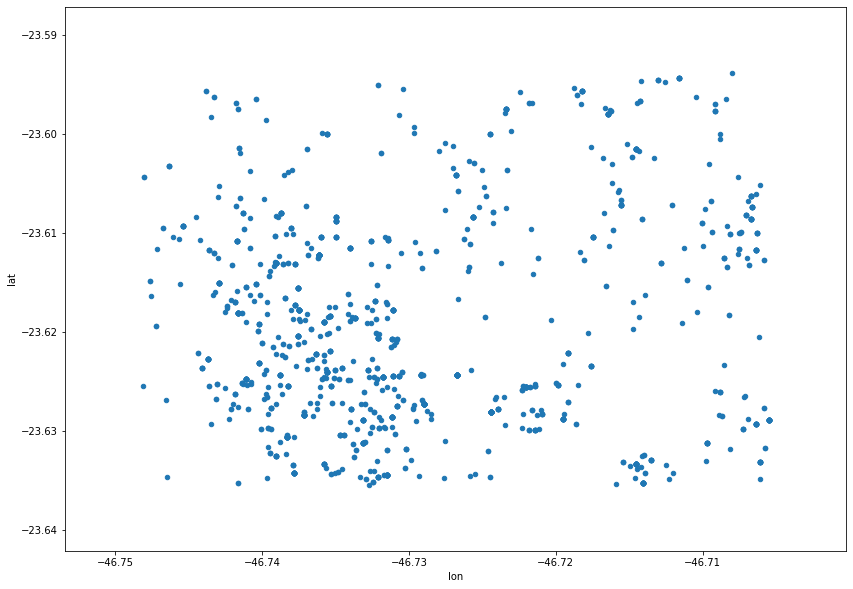

In [27]:
sp_df.plot(kind="scatter", x="lon", y="lat", figsize=(14, 10));

In [28]:
geo_sp = sp_df[['lon', 'lat']]
X = geo_sp[['lon', 'lat']]
geo_sp.head()

,lon,lat
154,-46.729195,-23.624269
156,-46.732323,-23.616831
157,-46.733921,-23.627695
158,-46.730850,-23.627405
159,-46.730850,-23.627405


In [29]:
km = KMeans(n_clusters = 20)
km.fit(geo_sp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

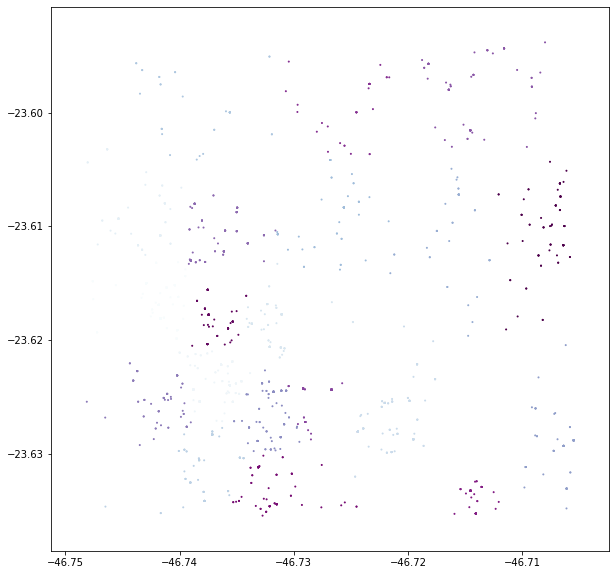

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(geo_sp.lon, geo_sp.lat, c=km.labels_, s=1, cmap = 'BuPu_r');

In [31]:
silhouette_score(X, km.labels_)

0.4527698174475599

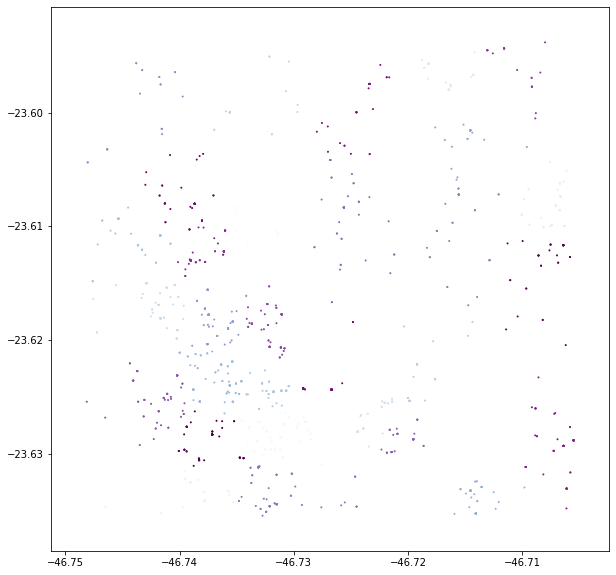

In [32]:
km = KMeans(n_clusters = 30)
km.fit(geo_sp)
plt.figure(figsize=(10, 10))
plt.scatter(geo_sp.lon, geo_sp.lat, c=km.labels_, s=1, cmap = 'BuPu_r');

In [33]:
silhouette_score(X, km.labels_)

0.4715638982723178

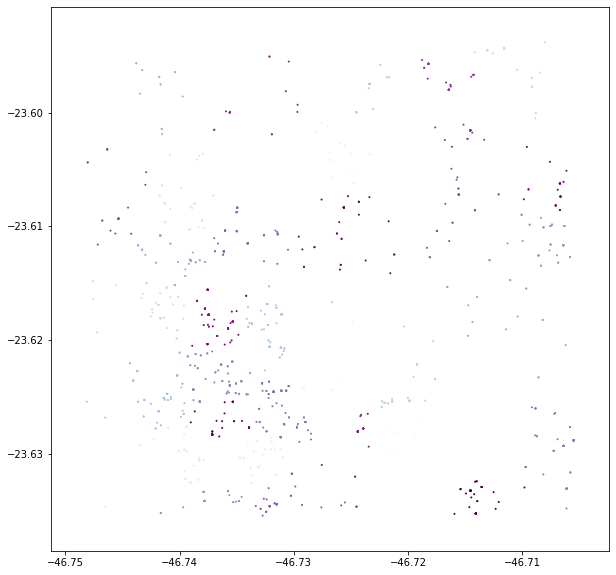

In [34]:
km = KMeans(n_clusters = 32)
km.fit(geo_sp)
plt.figure(figsize=(10, 10))
plt.scatter(geo_sp.lon, geo_sp.lat, c=km.labels_, s=1, cmap = 'BuPu_r');

In [35]:
silhouette_score(X, km.labels_)

0.46983189783741186

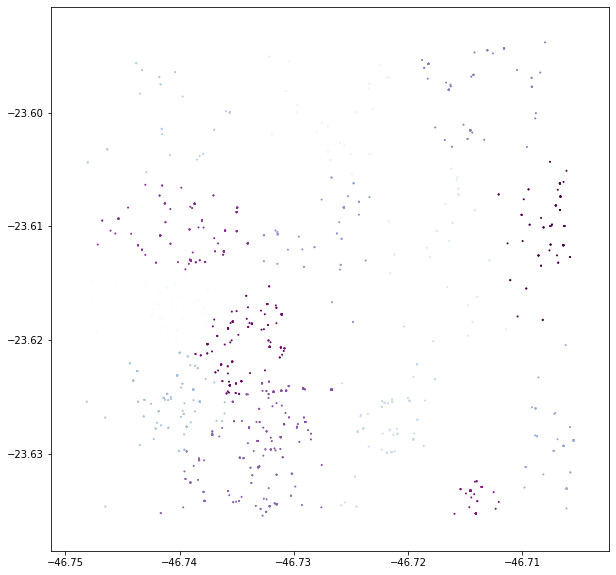

In [36]:
km = KMeans(n_clusters = 15)
km.fit(geo_sp)
plt.figure(figsize=(10, 10))
plt.scatter(geo_sp.lon, geo_sp.lat, c=km.labels_, s=1, cmap = 'BuPu_r');

In [37]:
silhouette_score(X, km.labels_)

0.43497668799320993

In [38]:
geo_sp['cluster'] = km.labels_

/Users/lindsayleedham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
geo_sp

,lon,lat,cluster
154,-46.729195,-23.624269,4
156,-46.732323,-23.616831,1
157,-46.733921,-23.627695,4
158,-46.730850,-23.627405,4
159,-46.730850,-23.627405,4
...,...,...,...
97130,-46.743280,-23.596245,10
97132,-46.741669,-23.597504,10
97183,-46.740397,-23.596428,10
97184,-46.725817,-23.611091,7


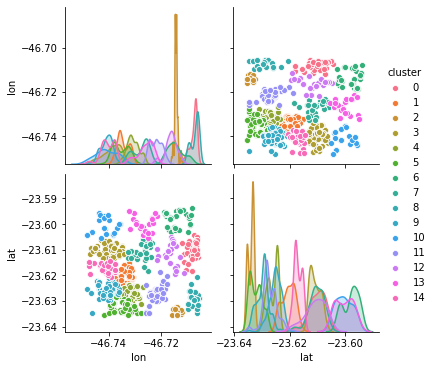

In [40]:
sns.pairplot(geo_sp, hue = "cluster")

In [46]:
def sil_scores(X, k):
    location_data = geo_sp[["lon", "lat"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    sil_score = silhouette_score(X, km.labels_)
    print(f'K: {k}, interia: {km.inertia_}, Silhouette score: {sil_score}')

In [50]:
for k in range(2, 103, 4):
    sil_scores(X, k)

K: 2, interia: 0.21054780958486893, Silhouette score: 0.45408146565223517
K: 6, interia: 0.05708012910064494, Silhouette score: 0.37998843960745227
K: 10, interia: 0.030209776134849216, Silhouette score: 0.4341560455667157
K: 14, interia: 0.020489185866576384, Silhouette score: 0.44417861140614456
K: 18, interia: 0.014829937052563445, Silhouette score: 0.4525770569371519
K: 22, interia: 0.011435591795301119, Silhouette score: 0.4537980985401078
K: 26, interia: 0.009563952355644128, Silhouette score: 0.4727721811154175
K: 30, interia: 0.007979303174569387, Silhouette score: 0.46948566616405224
K: 34, interia: 0.006536425108813563, Silhouette score: 0.48487722892506513
K: 38, interia: 0.005737106570710667, Silhouette score: 0.49746918880586843
K: 42, interia: 0.005114620177751416, Silhouette score: 0.49404552333728
K: 46, interia: 0.004460671903509595, Silhouette score: 0.5071562463725967
K: 50, interia: 0.003931845807278008, Silhouette score: 0.5294976159710243
K: 54, interia: 0.0034232